# Heart Attack Analysis & Prediction

* EDA
* Missing Value
* Categoric and Numeric Features
* Standarization
* Box - Swarm - Cat - Correlation Plot Analysis
* Outlier Detection
* Modelling and Tuning Machine Learning Model

## Introduction 

* A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood.
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle.
* Coronary artery disease (CAD) is the main cause of heart attack

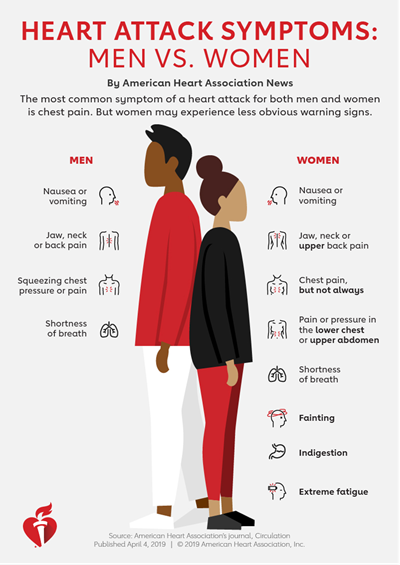

## Analysis Content
1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Read and Analyse Data](#3)
4. [Missing Value Analysis](#4)
5. [Unique Value Analysis](#5)
6. [Categorical Feature Analysis](#6)
7. [Numeric Feature Analysis](#7)
8. [Standardization](#8)
9. [Box Plot Analysis](#9)
10. [Swarm Plot Analysis](#10)
11. [Cat Plot Analysis](#11)
12. [Correlation Analysis](#12)
13. [Outlier Detection](#13)
14. [Modelling](#14)
    1. Encoding Categorical Columns
    2. Train/Test Split
    3. Scaling
    4. Logistic Regression
    5. Logistic Regression Hyperparameter Tuning
15. [Conclusion](#15)

<a id="1"></a>
## Python Libraries
* In this section, we import used libraries during this kernel.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


<a id="2"></a>
## Data Content
* **Age:** Age of the patient
* **Sex:** Sex of the patient
* **exang:** exercise induced angina (1 = yes; 0 = no)
* **ca:** number of major vessels (0-3)
* **cp:** Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* **trtbps:** resting blood pressure (in mm Hg)
* **chol:** cholestoral in mg/dl fetched via BMI sensor
* **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **rest_ecg:** resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach:** maximum heart rate achieved
* **target:** 0= less chance of heart attack 1= more chance of heart attack

<a id="3"></a>
## Read and Analyse Data
* In this section, we read heart.csv

In [2]:
#read data
df=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# describe basic statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<a id="4"></a>
## Missing Value Analysis

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<a id="5"></a>
## Unique Value Analysis

In [7]:
for i in list(df.columns):
    print("{}---{}".format(i,df[i].value_counts().shape[0]))

age---41
sex---2
cp---4
trtbps---49
chol---152
fbs---2
restecg---3
thalachh---91
exng---2
oldpeak---40
slp---3
caa---5
thall---4
output---2


<a id="6"></a>
## Categorical Feature Analysis

In [8]:
categorical_list=["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]

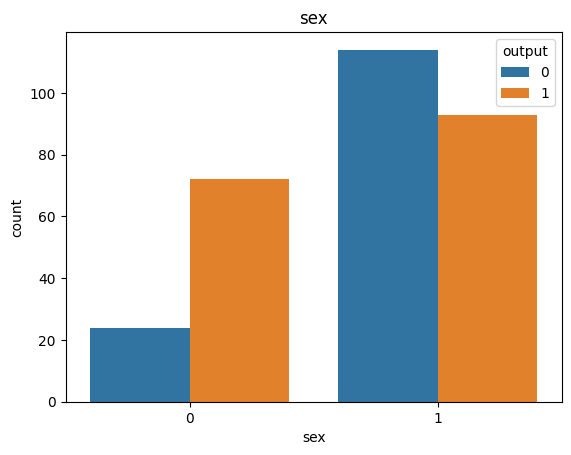

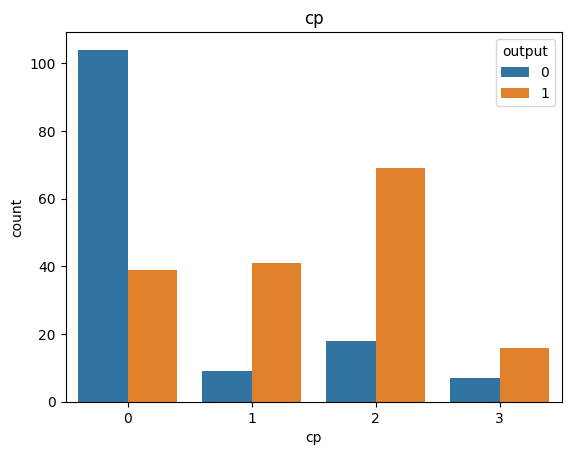

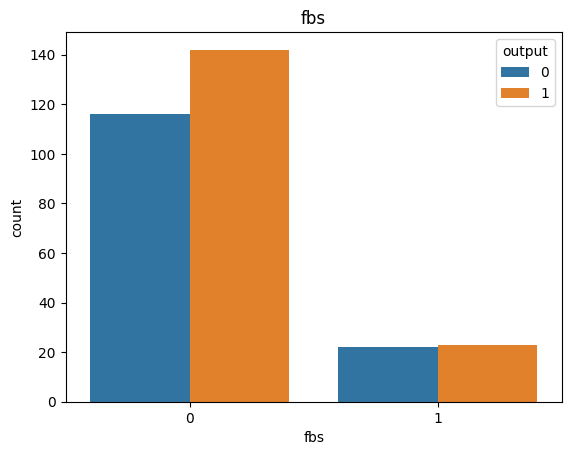

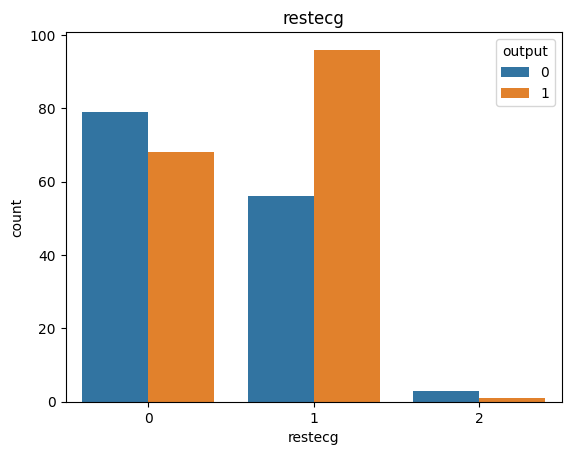

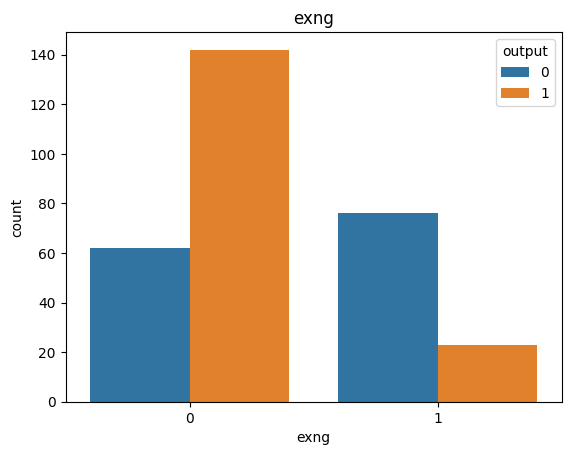

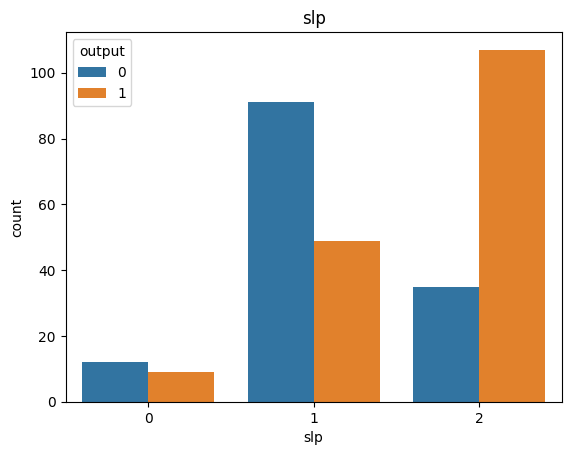

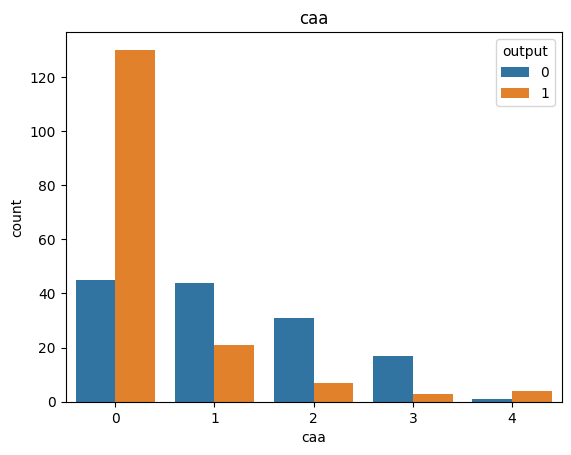

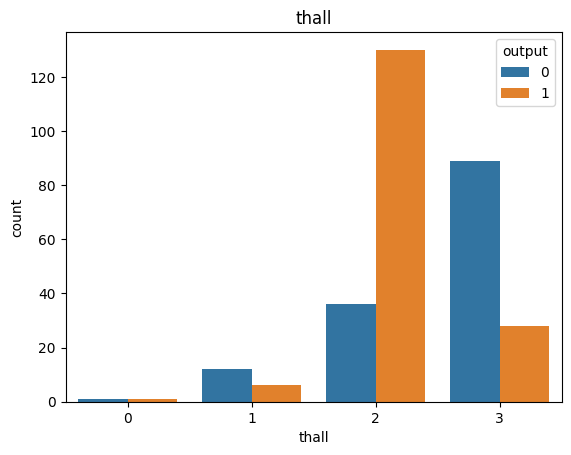

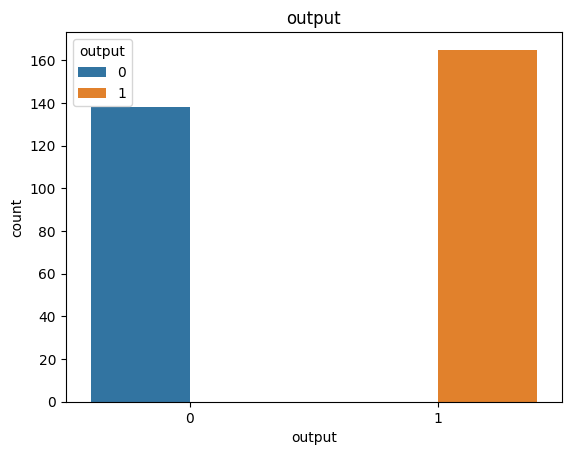

In [9]:
df_categoric=df.loc[:,categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x=i,data=df_categoric,hue="output")
    plt.title(i)

<a id="7"></a>
## Numeric Feature Analysis
* Bivariate Data Analysis with Scatter Plot

In [10]:
numeric_list=["age","trtbps","chol","thalachh","oldpeak","output"]

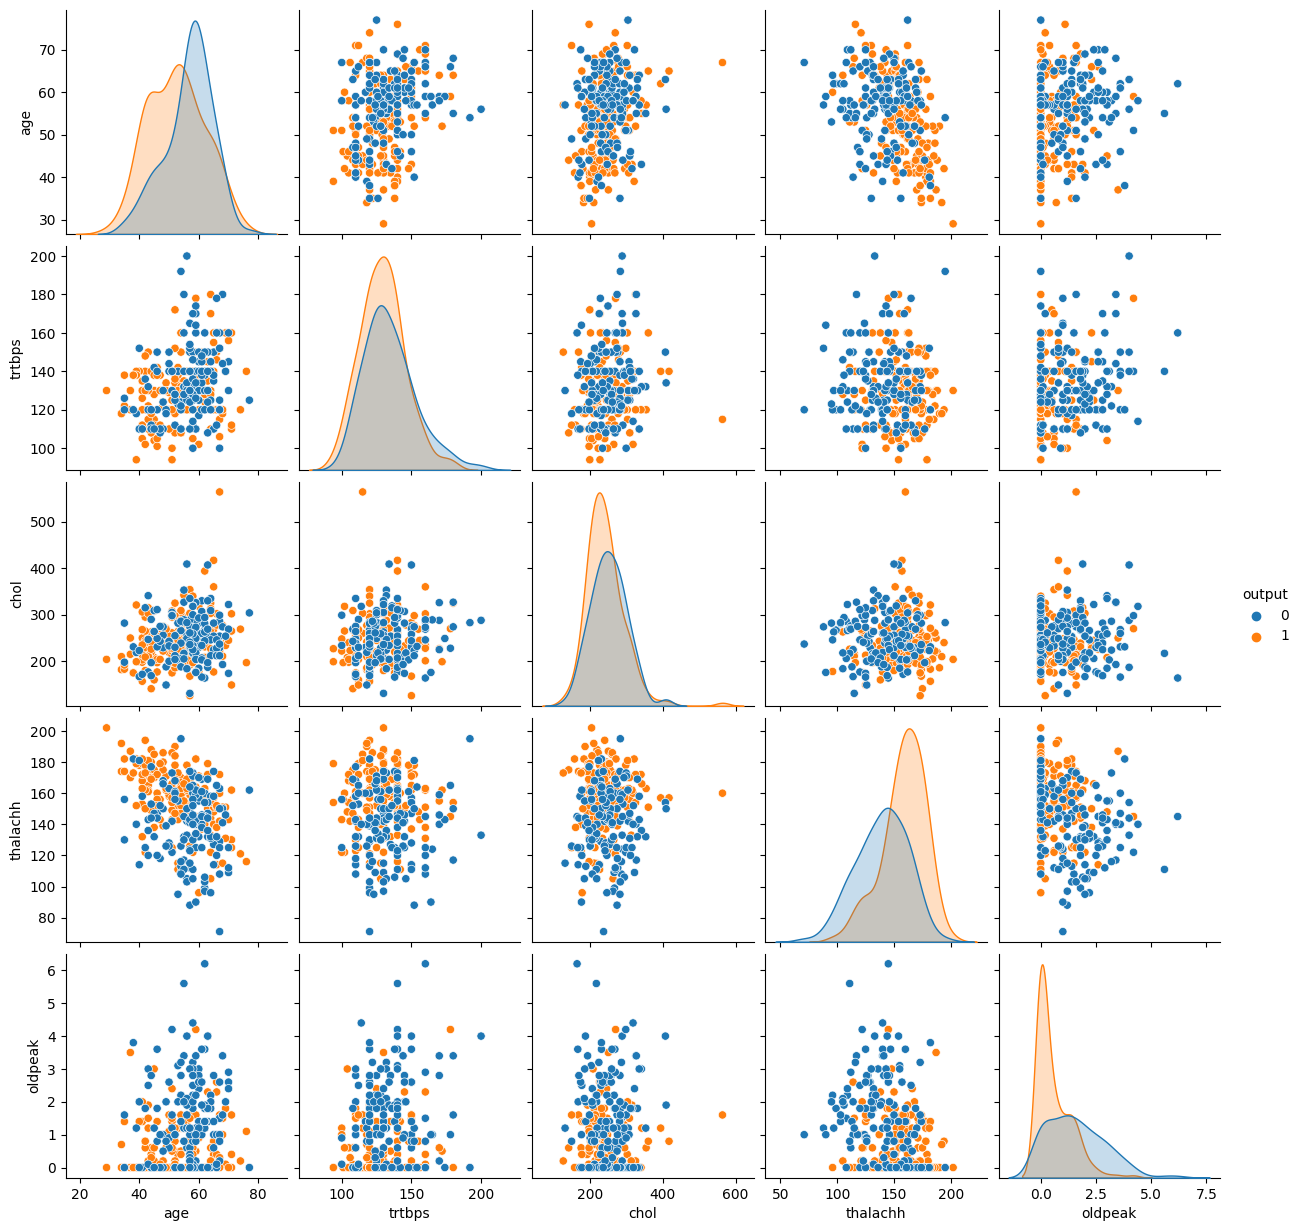

In [11]:
df_numeric=df.loc[:,numeric_list]
sns.pairplot(df_numeric,hue="output",diag_kind="kde")
plt.show()

* There appears to be a negative correlation between the variables "age" and "fortune". One of these can be selected when selecting features for the model. It would be better to look at the numerical values and then decide.

<a id="8"></a>
## Standardization

In [12]:
scaler=StandardScaler()
scaler

StandardScaler()

In [13]:
scaled_array=scaler.fit_transform(df[numeric_list[:-1]])

In [14]:
 scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [15]:
pd.DataFrame(scaled_array).describe().T

,count,mean,std,min,25%,50%,75%,max
0,303.0,4.690051e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
1,303.0,-7.035077e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
2,303.0,-1.113887e-16,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
3,303.0,-6.800574e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
4,303.0,2.345026e-17,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


<a id="9"></a>
## Box Plot Analysis

In [16]:
df_dummy=pd.DataFrame(scaled_array,columns=numeric_list[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [17]:
df_dummy=pd.concat([df_dummy,df.loc[:,"output"]],axis=1)
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [18]:
df_melted=pd.melt(df_dummy,id_vars="output",var_name="features",value_name="value")
df_melted.head()

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464


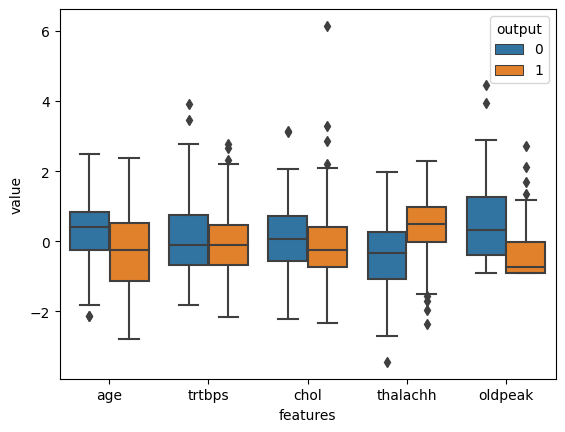

In [19]:
#box plot
plt.figure()
sns.boxplot(x="features",y="value",hue="output",data=df_melted)
plt.show()

* According to the box plot, it was observed that "thalachh" and "oldpeak" features could be important features for logistic regression due to their median values.

<a id="10"></a>
## Swarm Plot Analysis

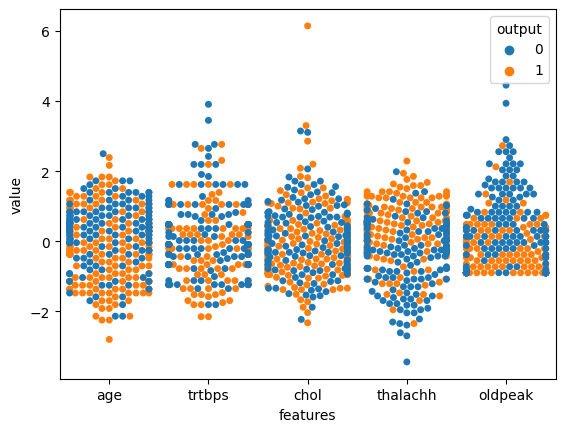

In [20]:
#box plot
plt.figure()
sns.swarmplot(x="features",y="value",hue="output",data=df_melted)
plt.show()

* With the swarm plot, how individuals are distributed can be better observed.
* According to the graph, it can be seen that orange and blue are more clearly separated from each other.

<a id="11"></a>
## Cat Plot Analysis

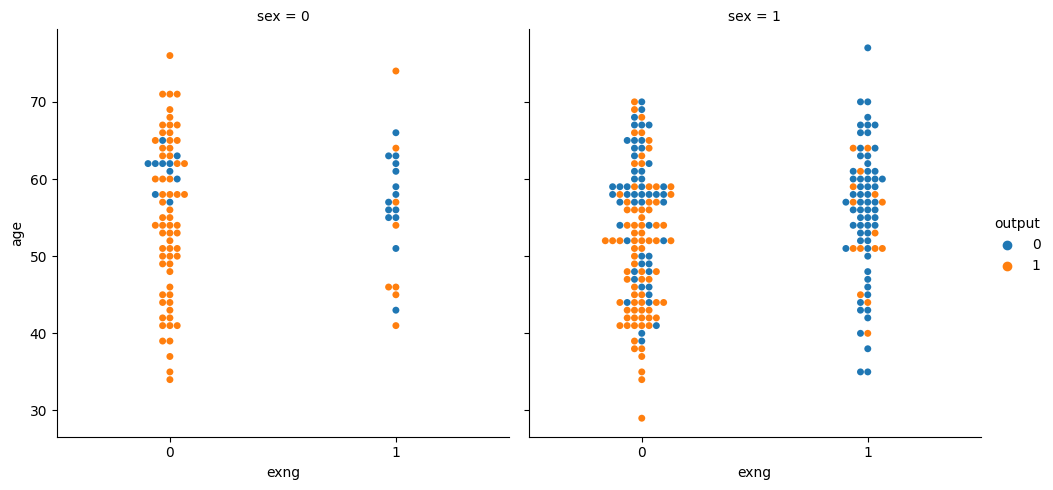

In [21]:
sns.catplot(x="exng",y="age",hue="output",col="sex",kind="swarm",data=df)
plt.show()

<a id="12"></a>
## Correlation Analysis

In [22]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


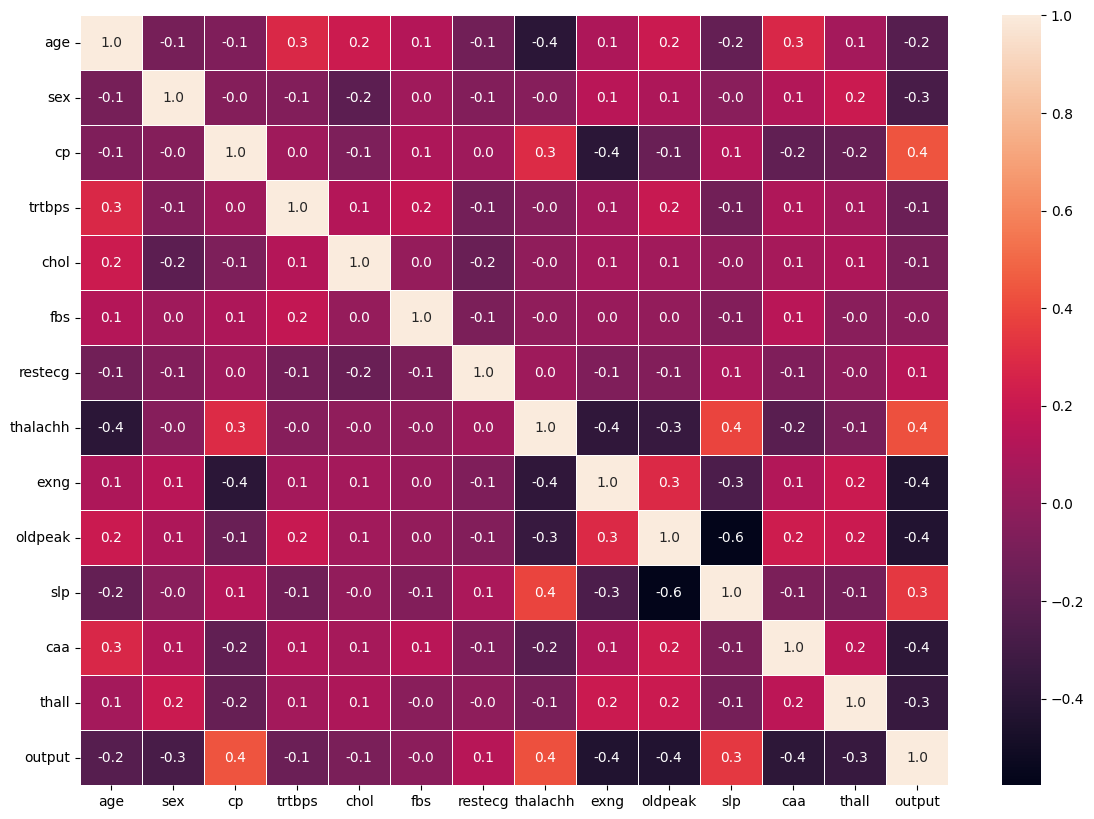

In [23]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidth=.7)
plt.show()

* The two most associated features are "slp" and "oldpeak". When we look at the table, there are generally no features that have a strong relationship with each other.

* The variable “output” has a positive correlation with “cp”, “thalachh” and “slp”.

<a id="13"></a>
## Outlier Detection
* Outlier can discrupt ML process.
* 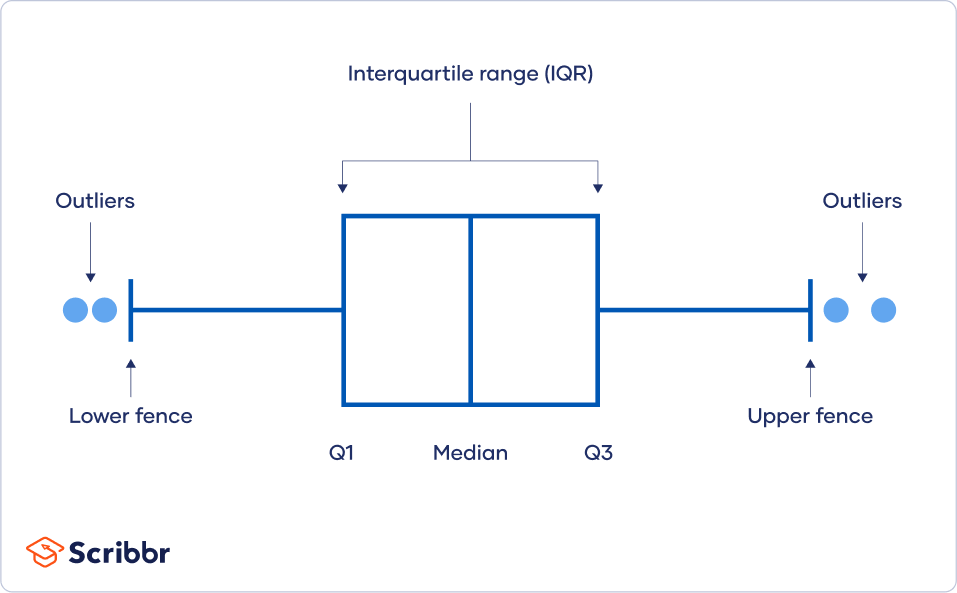

In [24]:
numeric_list=["age","trtbps","chol","thalachh","oldpeak"]
df_numeric=df.loc[:,numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [26]:
# outlier detection
for i in numeric_list:
    
    #IQR
    Q1=np.percentile(df.loc[:,i],25)
    Q3=np.percentile(df.loc[:,i],75)
    IQR=Q3-Q1
    
    print("Old shape: ", df.loc[:,i].shape)
    
    #upper bound
    upper=np.where(df.loc[:,i]>=(Q3+2.5*IQR))
    
    #lower bound
    lower=np.where(df.loc[:,i]<=(Q1-2.5*IQR))
    
    print("{} -- {}".format(upper,lower))
    
    try:
        df.drop(upper[0],inplace=True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
        
    try:
        df.drop(lower[0],inplace=True)
    except: print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ",df.shape)

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (303, 14)
Old shape:  (303,)
(array([223, 248]),) -- (array([], dtype=int64),)
New shape:  (301, 14)
Old shape:  (301,)
(array([85]),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([203, 220]),) -- (array([], dtype=int64),)
New shape:  (298, 14)


<a id="14"></a>
## Modelling

In [27]:
df1=df.copy()

### Encoding Categorical Columns
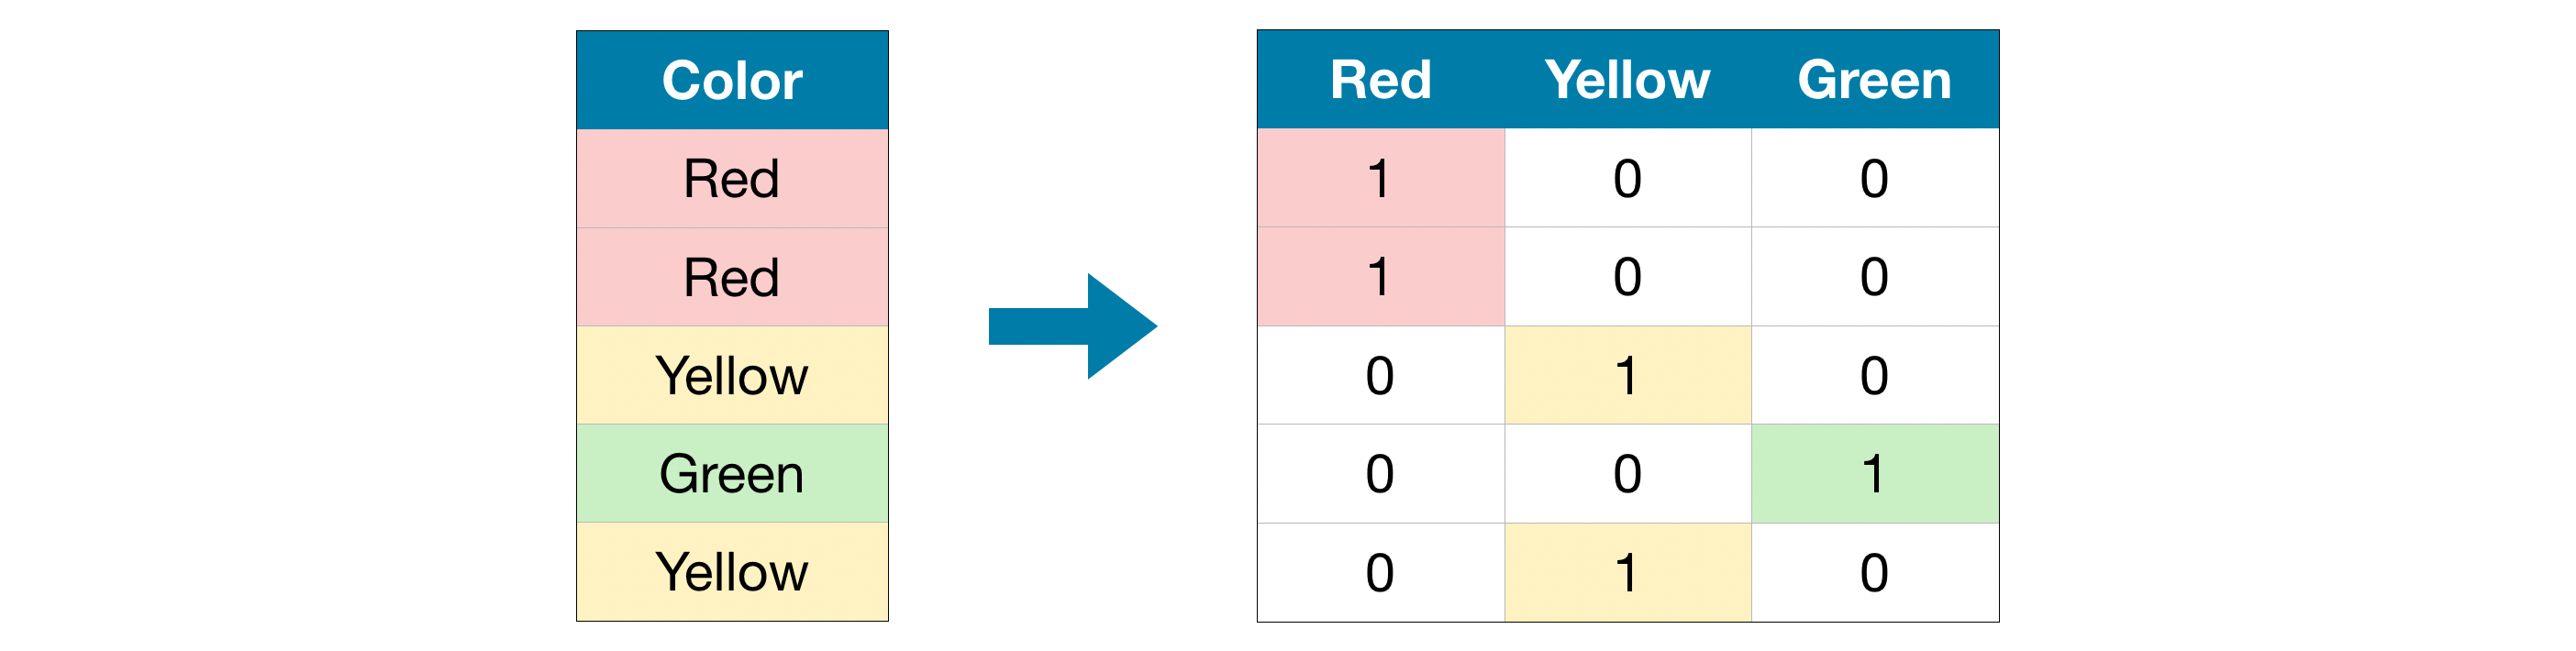

In [28]:
df1=pd.get_dummies(df1,columns=categorical_list[:-1],drop_first=True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


### Train/Test Split

* In order to avoid data leakage, the data should first be separated into test and train and fitted according to the train data, and then only the transform process should be applied to the test data.

In [29]:
X=df1.drop(["output"],axis=1)
y=df1[["output"]]

In [30]:
X_numeric=X[numeric_list[:-1]]

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X_numeric,y,test_size=0.1,stratify=y, random_state=3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (268, 4)
X_test: (30, 4)
y_train: (268, 1)
y_test: (30, 1)


### Scaling

In [32]:
scaler=StandardScaler()
scaler

StandardScaler()

In [33]:
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled

array([[ 2.17642121, -0.67917855,  0.54081318, -1.24605037],
       [ 0.53491778,  1.99401018, -1.44580843, -2.59539688],
       [ 0.53491778,  0.23213579, -0.20684012,  0.49504191],
       ...,
       [-1.43488633, -0.07163565, -0.63407057,  0.79973306],
       [ 0.75378491,  1.14345013, -0.01458641, -0.54961346],
       [-1.10658564, -1.40823002, -2.19346172,  1.1044242 ]])

In [34]:
X_test_scaled=scaler.transform(X_test)
X_test_scaled

array([[ 1.84812052, -1.28672144,  0.45536708, -0.8543046 ],
       [ 0.64435135, -0.07163565,  0.19902881, -0.24492231],
       [ 0.31605066,  1.14345013,  0.69034383, -1.63779613],
       [-1.10658564, -0.07163565, -0.52726296,  1.67027919],
       [ 0.31605066, -0.19314423, -0.31364773,  0.01624153],
       [ 1.19151915,  1.75099303,  2.48471173,  0.05976884],
       [ 1.30095272, -1.16521286, -0.67679361, -0.76724999],
       [-0.12168359, -0.49691568,  0.81851297, -2.37776034],
       [ 0.42548422,  0.90043298, -0.54862448, -1.94248728],
       [ 1.41038628,  1.75099303,  0.90395906, -1.81190535],
       [ 0.31605066, -1.28672144,  1.95067367, -0.28844962],
       [-0.34055071, -2.25879007, -0.35637077,  0.19035076],
       [-1.32545277, -0.07163565, -1.36036234,  0.01624153],
       [ 1.30095272,  0.90043298,  0.73306688,  0.10329615],
       [ 0.86321847,  1.75099303, -1.7021467 , -0.201395  ],
       [-0.23111715, -0.80068713, -1.2321932 ,  1.75733381],
       [-0.77828496, -1.

### Logistic Regression

In [35]:
logreg=LogisticRegression()
logreg

LogisticRegression()

In [36]:
#fitting=training
logreg.fit(X_train,y_train)

LogisticRegression()

In [37]:
#calculate probabilities
y_pred_prob=logreg.predict_proba(X_test)

In [38]:
y_pred_prob

array([[0.65842839, 0.34157161],
       [0.52544032, 0.47455968],
       [0.8529173 , 0.1470827 ],
       [0.11161736, 0.88838264],
       [0.42192098, 0.57807902],
       [0.65543478, 0.34456522],
       [0.57238074, 0.42761926],
       [0.90376899, 0.09623101],
       [0.85103152, 0.14896848],
       [0.89504844, 0.10495156],
       [0.58477932, 0.41522068],
       [0.29824152, 0.70175848],
       [0.34412661, 0.65587339],
       [0.51804677, 0.48195323],
       [0.4781487 , 0.5218513 ],
       [0.08487407, 0.91512593],
       [0.41173572, 0.58826428],
       [0.25722972, 0.74277028],
       [0.25148231, 0.74851769],
       [0.33275197, 0.66724803],
       [0.40511099, 0.59488901],
       [0.46960135, 0.53039865],
       [0.40242932, 0.59757068],
       [0.53044293, 0.46955707],
       [0.31818893, 0.68181107],
       [0.2218041 , 0.7781959 ],
       [0.40295758, 0.59704242],
       [0.58547134, 0.41452866],
       [0.3818993 , 0.6181007 ],
       [0.22490963, 0.77509037]])

In [39]:
y_test_pred=logreg.predict(X_test)
y_test_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1])

In [40]:
print("Test accuracy: {}".format(accuracy_score(y_test,y_test_pred)))

Test accuracy: 0.7


#### ROC Curve
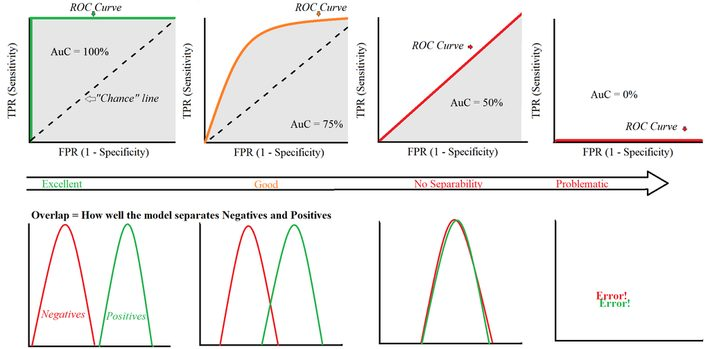!

In [41]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])

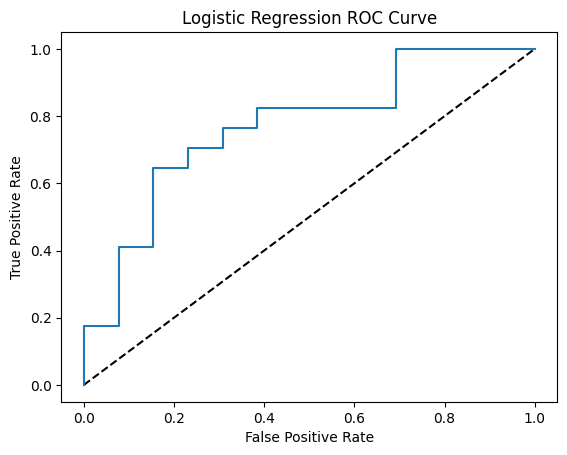

In [42]:
#Plot Curve
plt.plot([0,1],[0,1],"--k")
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

### Logistic Regression Hyperparameter Tuning

In [43]:
lr=LogisticRegression()
lr

LogisticRegression()

In [44]:
penalty=["l1","l2"]
parameters={"penalty":penalty}

In [45]:
lr_searcher=GridSearchCV(lr,parameters)

In [46]:
lr_searcher.fit(X_train_scaled,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [47]:
print("Best parameters: ",lr_searcher.best_params_)

Best parameters:  {'penalty': 'l2'}


In [48]:
y_test_pred=lr_searcher.predict(X_test_scaled)

In [49]:
print("Test accuracy: {}".format(accuracy_score(y_test,y_test_pred)))

Test accuracy: 0.7


### Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)

In [51]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.6

### Random Forest Classifier Hyperparameter Tuning

In [52]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}
rf_model = RandomForestClassifier()

In [53]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [54]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=2, max_features=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_s

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=2, max_features=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_s

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=2, max_features=2, min_samples_split=5, n_estimators=500; total time=   1.7s
[CV] END max_depth=2, max_features=2, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END max_depth=2, max_features=2, min_samples_split=5, n_estimators=1000; total time=   3.2s
[CV] END max_depth=2, max_features=2, 

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=1000; total time=   3.4s
[CV] END max_depth=2, max_features=2, min_samples_split=5, n_estimators=500; total time=   1.9s
[CV] END max_depth=2, max_features=2, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END max_depth=2, max_features=2, min_samples_split=5, n_estimators=1000; total time=   3.1s
[CV] END max_depth=2, max_features=2, 

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

[CV] END max_depth=5, max_features=2, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=2, min_samples_split=5, n_estimators=500; total time=   1.7s
[CV] END max_depth=5, max_features=2, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=2, min_samples_split=5, n_estimators=1000; total time=   3.2s
[CV] END max_depth=5, max_features=2, min_samples_split=5, n_estimators=1000; total time=   3.2s
[CV] END max_depth=5, max_features=2, min_samples_split=5, n_estimators=1000; total time=   3.1s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=1000; total time=   3.5s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=1000; total time=   3.2s
[CV] END max_depth=5, max_featu

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=1000; total time=   3.3s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=1000; total time=   3.3s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=1000; total time=   3.3s
[CV] END max_depth=5, max_features=5, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=5, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=5, m

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=1000; total time=   3.6s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=1000; total time=   3.2s
[CV] END max_depth=5, max_feature

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

[CV] END max_depth=5, max_features=2, min_samples_split=5, n_estimators=1000; total time=   3.2s
[CV] END max_depth=5, max_features=2, min_samples_split=5, n_estimators=1000; total time=   3.2s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=1000; total time=   3.9s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=1000; total time=   3.1s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.8s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=1000; total time=   3.4s
[CV] END max_depth=5, max_featu

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

[CV] END max_depth=8, max_features=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=5, min_samples_split=5, n_estimators=500; total time=   1.7s
[CV] END max_depth=8, max_features=5, min_samples_split=5, n_estimators=500; total time=   1.8s
[CV] END max_depth=8, max_features=5, min_samples_split=5, n_estimators=500; total time=   1.7s
[CV] END max_depth=8, max_features=5, min_samples_split=5, n_estimators=1000; total time=   3.4s
[CV] END max_depth=8, max_features=5, min_sam

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=1000; total time=   4.1s
[CV] END max_depth=8, max_features=5, min_sam

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

[CV] END max_depth=8, max_features=8, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=8, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=8, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=8, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=8, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=8, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=8, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=8, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=8, min_samples_split=5, n_estimators=500; total time=   1.7s
[CV] END max_depth=8, max_features=8, min_samples_split=5, n_estimators=500; total time=   1.7s
[CV] END max_depth=8, max_features=8, min_sample

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [55]:
print("Best parameters: " + str(rf_cv_model.best_params_))

Best parameters: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 10}


In [56]:
y_pred=rf_cv_model.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred)

0.7666666666666667

<a id="15"></a>
## Conclusion

* When Logistic Regression and Random Forest Classifier were applied to the dataset given for heart attack prediction, it was seen that both gave similar results. It was concluded that between these two algorithms, using logistic regression is more advantageous in terms of complexity.